## Regression - Boston Housing Price Prediction

![](https://miro.medium.com/max/1167/1*NNdn--M4nbZxf04Tlo39Zw.png)

In [0]:
#update latest pytorch
# !pip install torch torchvision

### 1. Load Packages

---

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# for model training
import torch
import torch.nn as nn
import torch.nn.functional as F

### 2.Load dataset

---

In [23]:
from sklearn.datasets import load_boston
from sklearn.model_selection  import train_test_split
from sklearn.metrics import r2_score

boston = load_boston()
print("Type of dataset ",type(boston))

Type of dataset  <class 'sklearn.utils.Bunch'>


In [4]:
# Load dataset from dictionary to dataframe
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
# Set the target
boston_df["Price"] = boston['target']

### 3. Data Exploration and Investigation

---

In [6]:
# Missing Value Checking
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [7]:
#  Datatypes checking of each variable
boston_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

### 4. Target Variable Distribution Checking
---

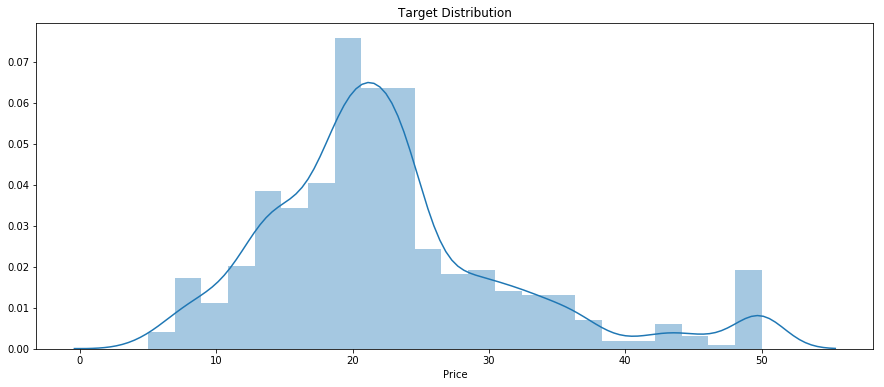

In [8]:
import seaborn as sns
plt.figure(figsize=(15,6))
plt.title("Target Distribution")
sns.distplot(boston_df['Price']);

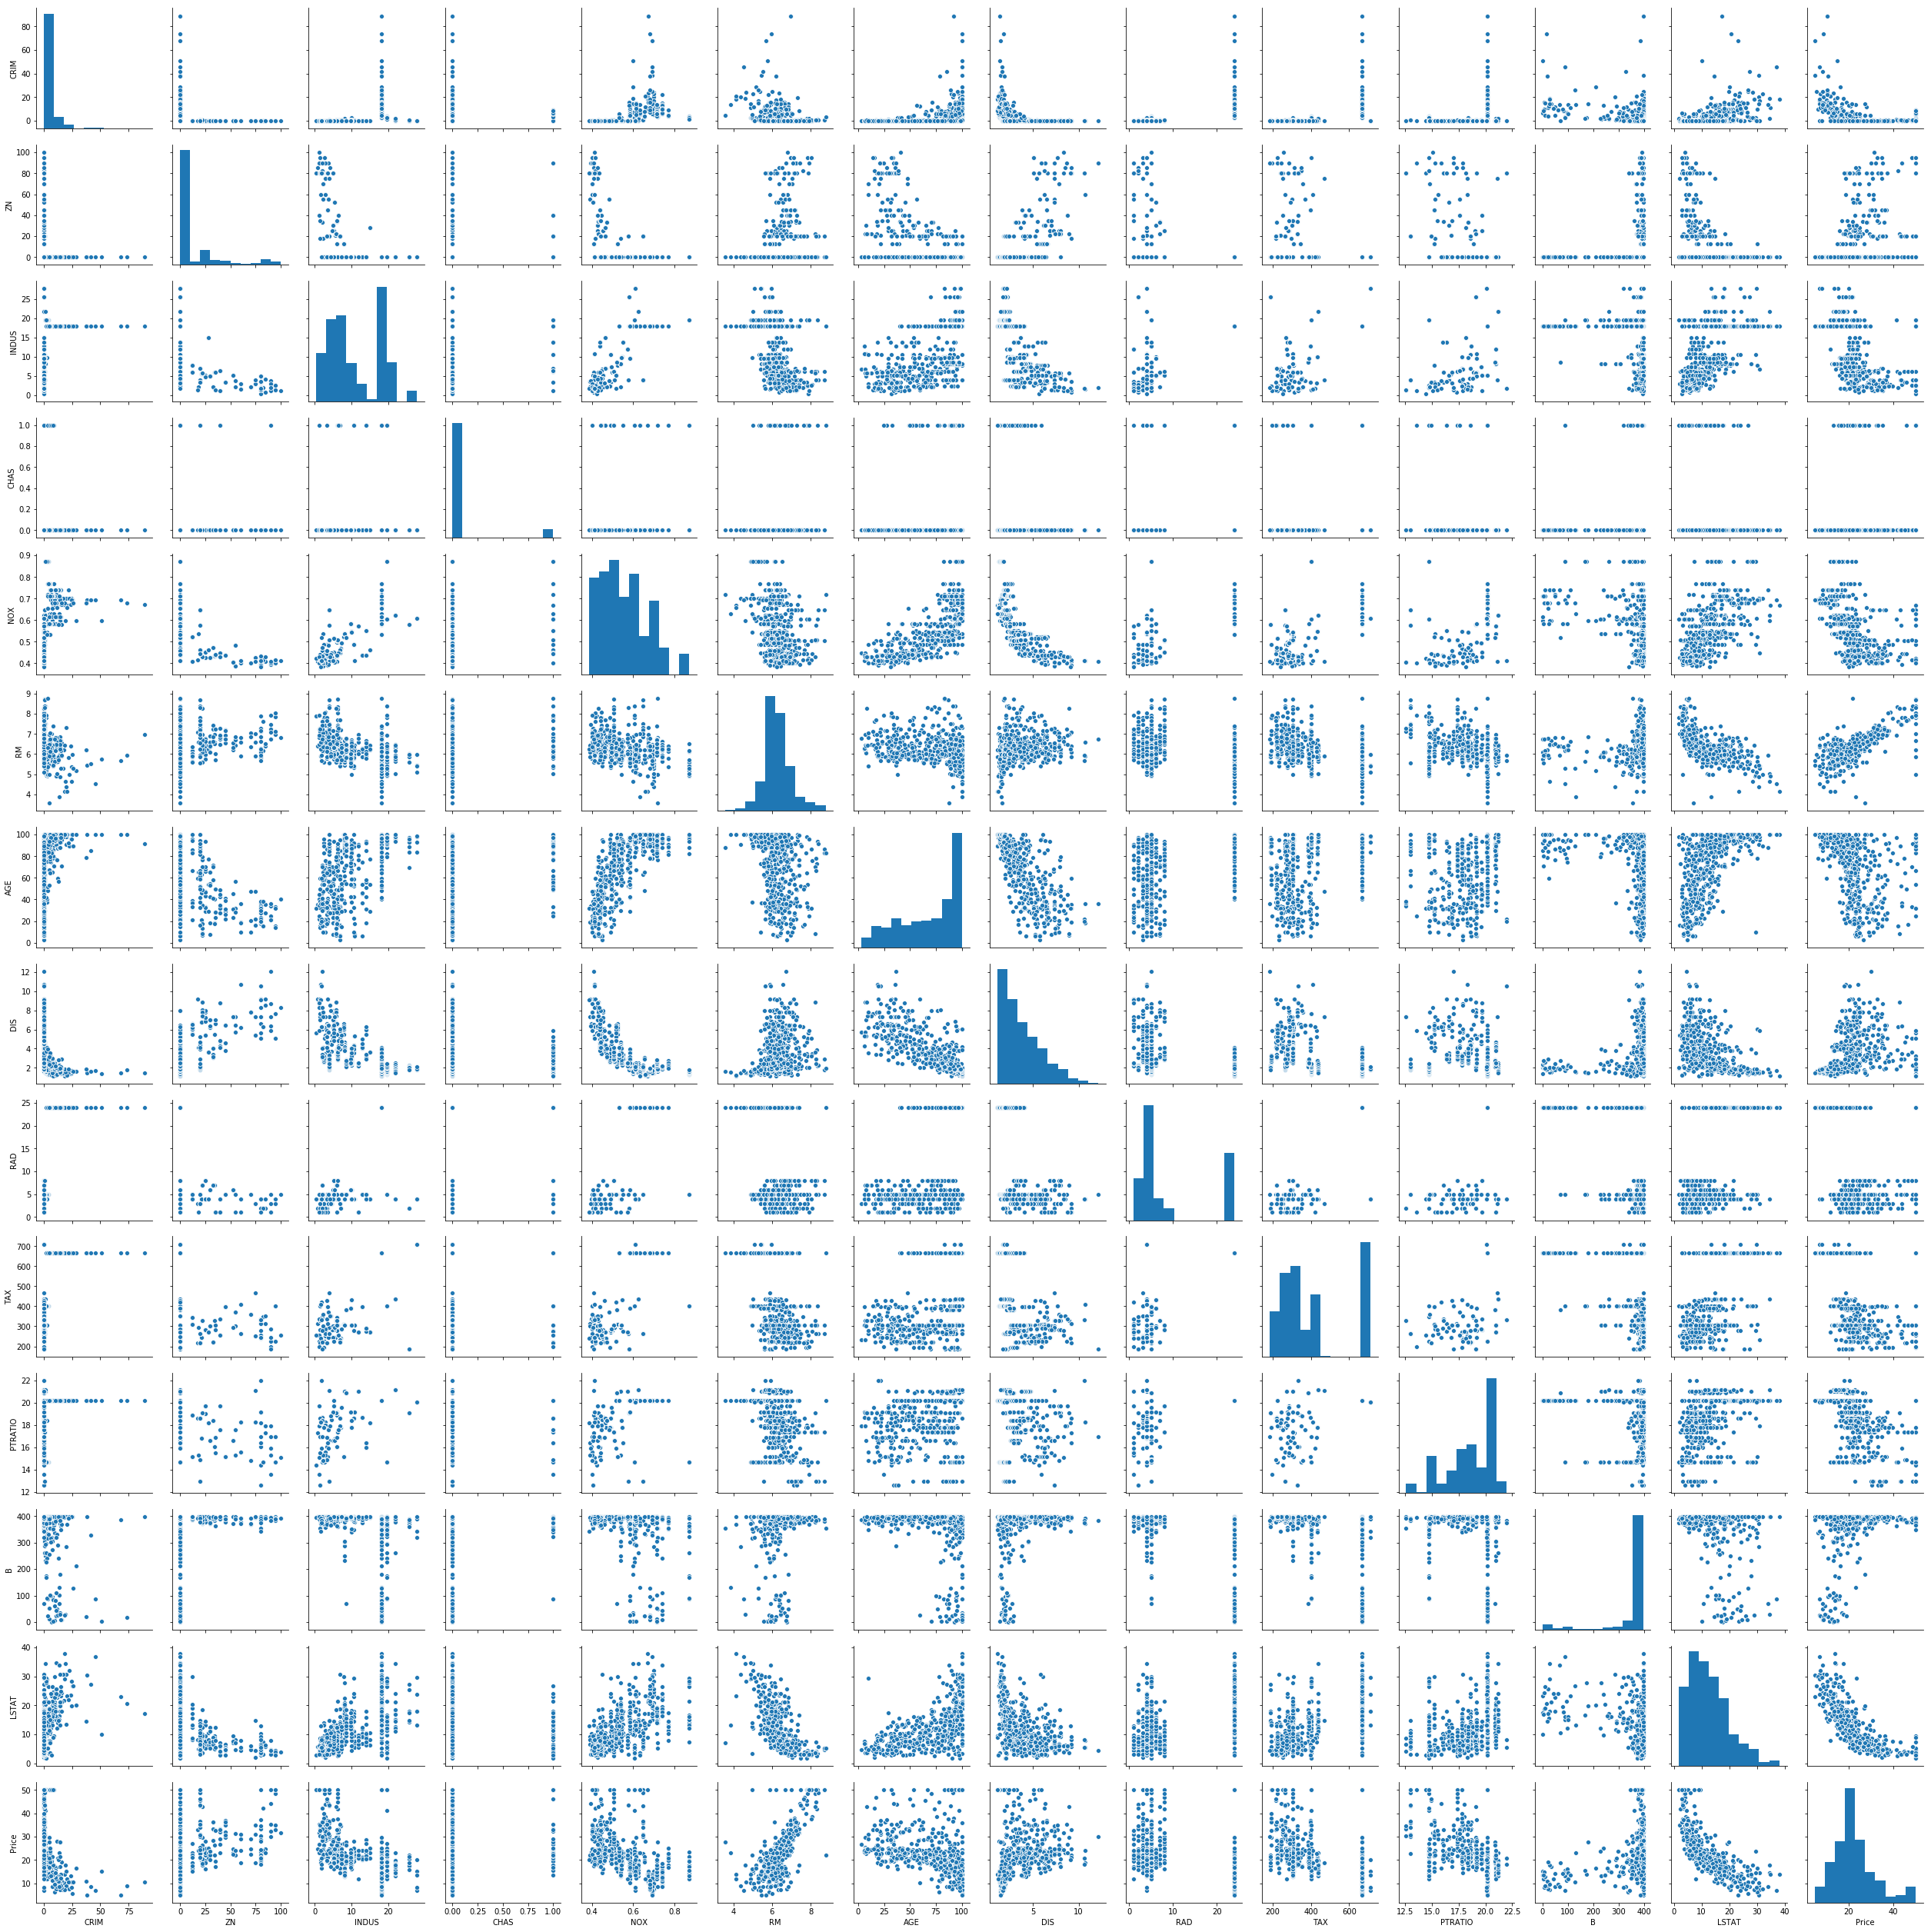

In [9]:
sns.pairplot(boston_df)

### 5. Dataset Prepreration for Model Training
---

In [10]:
X = boston_df.iloc[:,0:13]  # Features
y = boston_df['Price'] # Labels

# Split dataset from Train and Validation
# Train ====> 80%  |  Validation ====> 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train:",X_train.shape,"\nX_test:", X_test.shape,"\ny_train:",y_train.shape, "\ny_test:",y_test.shape) # print shape of dataset

X_train: (404, 13) 
X_test: (102, 13) 
y_train: (404,) 
y_test: (102,)


### 6.Model Hyperparameter Design
---

In [0]:
# 1.hyperparameter for model
batch_size, num_epochs, learning_rate, size_hidden = 32, 200, 0.01, 100

In [0]:
# 2. Other parameter Calculation
batch_no = len(X_train) // batch_size
cols = X_train.shape[1]
n_output = 1

### 7. Model Design

In [16]:
#Create the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print("Executing the model on :",device)

Executing the model on : cuda:0


In [0]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, size_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(cols, size_hidden)   # hidden layer
        self.predict = torch.nn.Linear(size_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x
net = Net(cols, size_hidden, n_output)

In [0]:
net = Net(cols, num_hidden_layers, n_output)
# Model optimization Adam is best to use
optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)
# This is for regression mean squared loss
criterion = torch.nn.MSELoss()

In [0]:
# Now value convert into numpy array
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

### 8.  Model Training

---

In [21]:
from sklearn.utils import shuffle
from torch.autograd import Variable
running_loss = 0.0

for epoch in range(num_epochs):
    #Shuffle just mixes up the dataset between epocs
    X_train, y_train = shuffle(X_train, y_train)

    # Mini batch learning
    for i in range(batch_no):
        # Define the start and end of Betch size
        start = i * batch_size
        end = start + batch_size

        # Convert Feature and Labels into Float Tensor
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.FloatTensor(y_train[start:end]))

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        # Calculating the Loss using Backward propogation
        loss = criterion(outputs, torch.unsqueeze(labels,dim=1))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    print('Epoch {}'.format(epoch+1), "loss: ",running_loss)
    running_loss = 0.0

Epoch 1 loss:  13637.8373336792
Epoch 2 loss:  2396.221954345703
Epoch 3 loss:  1000.9800148010254
Epoch 4 loss:  794.3372611999512
Epoch 5 loss:  699.2013244628906
Epoch 6 loss:  723.0090599060059
Epoch 7 loss:  761.2895679473877
Epoch 8 loss:  751.0458965301514
Epoch 9 loss:  652.2982997894287
Epoch 10 loss:  603.3404998779297
Epoch 11 loss:  593.3138408660889
Epoch 12 loss:  578.0045642852783
Epoch 13 loss:  543.1840267181396
Epoch 14 loss:  514.9123935699463
Epoch 15 loss:  520.4901757240295
Epoch 16 loss:  515.659158706665
Epoch 17 loss:  573.1282777786255
Epoch 18 loss:  477.5619201660156
Epoch 19 loss:  460.52824211120605
Epoch 20 loss:  465.16138076782227
Epoch 21 loss:  417.99400520324707
Epoch 22 loss:  401.61316680908203
Epoch 23 loss:  401.80770206451416
Epoch 24 loss:  436.3034133911133
Epoch 25 loss:  462.1151752471924
Epoch 26 loss:  544.5099716186523
Epoch 27 loss:  452.9319591522217
Epoch 28 loss:  438.16650581359863
Epoch 29 loss:  365.7246313095093
Epoch 30 loss:  33

### 9. R2 Score Calculation
---

In [0]:
def calculate_r2(x,y=[]):
    """
    This function will return the r2 if passed x and y or return predictions if just passed x. 
    """
    # Evaluate the model with the test set. 
    X = Variable(torch.FloatTensor(x))  
    result = net(X) #This outputs the value for regression
    result=result.data[:,0].numpy()
  
    if len(y) != 0:
        r2=r2_score(result, y)
        print("R-Squared", r2)
        #print('Accuracy {:.2f}'.format(num_right / len(y)), "for a total of ", len(y), "records")
        return pd.DataFrame(data= {'actual': y, 'predicted': result})
    else:
        print("returning predictions")
        return result

In [33]:
Res1 = calculate_r2(X_train,y_train)
Res2 = calculate_r2(X_test,y_test)

R-Squared 0.7643745481836646
R-Squared 0.37366212904862317


### 10. Model Traing using scikit learn
---

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print('R2 for Train)', lm.score( X_train, y_train ))
print('R2 for Test (cross validation)', lm.score(X_test, y_test))

R2 for Train) 0.7730135569264233
R2 for Test (cross validation) 0.5892223849182503


In [0]:
### Thanks for Reading...!!!